# Сборный проект

**Цель исследования:** Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные по играм за 2016 год.
**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Ход исследования:** Данные мы получим из файла `/datasets/games.csv`. О данных ничего неизвестно, поэтому потребуется просмотреть данные, при необходимости их обработать, далее проводить анализ и проверять гипотезы. Делать работу предполагается в 6 этапов.

**1. Импорт библиотек, открытие файла с данными и изучение общей информации.**

**2. Подготовка данных.**
- Замена названий столбцов
- Преобразование данных в нужные типы
- Обработка пропусков
- Проверка на дубликаты и их обработка
- Подсчет и запись суммарных продаж во всех регионах в отдельный столбец

**3. Исследовательский анализ данных.**
- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не будем учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесём выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**4. Составление портрета пользователя каждого региона.**

Определим портрет для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**5. Проверим гипотезы.**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**6. Общий вывод.**

## Импортируем библиотеки, откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats as st
import os

In [2]:
pth1 = '/datasets/games.csv'
pth2 = 'games.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Видим, что есть пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`. 

## Предобработка данных

In [6]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

# приведем все данные в таблице к нижнему регистру
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8,e
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.3,e
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8,e
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,"1,989.00",puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,ds,"2,006.00",platform,11.28,9.14,6.50,2.88,89.00,8.5,e
7,wii play,wii,"2,006.00",misc,13.96,9.18,2.93,2.84,58.00,6.6,e
8,new super mario bros. wii,wii,"2,009.00",platform,14.44,6.94,4.70,2.24,87.00,8.4,e
9,duck hunt,nes,"1,984.00",shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Необходимо изменить тип данных в столбце `year_of_release` на int (так как год это целое число) и в столбце `user_score` на float. Остальные типы данных выглядят корректно.

In [7]:
data['year_of_release'] = data['year_of_release'].astype('int', errors='ignore')

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` помимо пропусков и числовых значений встречается tbd. Предположительно это является осутствием значения, поэтому заменим их на пропуски.

In [9]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float64')

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [11]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,54.600000


В столбце `year_of_release` пропусков немного (менее 1.6%), заполнять их не будем, так как мы не знаем наверняка, в каком году вышла игра, при заполнении данные исказятся. Так же поступим с `name` и `genre`. Видим большое количество пропусков в следующих столбцах: `сritic_score`, `user_score`, `rating`.

Столбец `сritic_score`: заполнить пропуски средним или медианой некорректно, оценки критиков не зависят друг от друга. Поставить какие-либо значения, например 0, тоже неправильно, так как оценка может равнятся 0. Удалить такое количество строк с пропусками мы так же не можем, данные будут искажены. Поэтому пропуски в этом столбце оставим как есть.

Столбец `user_score`: по аналогии с `сritic_score` данные оставим как есть. Можно предположить, что данных нет, потому что у пользователей не было возможности поставить оценки играм.

Столбец `rating`: эти данные нам понадобятся в дальнейшем исследовании, все пропуски заменим на значение 'no rating'.

In [12]:
data['rating'] = data['rating'].fillna('no_rating')
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64

In [13]:
# Посчитаем количество продаж во всех регионах и запишем в отдельный столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проверим явные и неявные дубликаты.

In [14]:
data.duplicated().sum()

0

In [15]:
data['name'].unique()

array(['wii sports', 'super mario bros.', 'mario kart wii', ...,
       'woody woodpecker in crazy castle 5', 'lma manager 2007',
       'haitaka no psychedelica'], dtype=object)

In [16]:
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

In [17]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

Дубликатов не обнаружено, данные обработаны, можно перейти к анализу.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [18]:
data_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

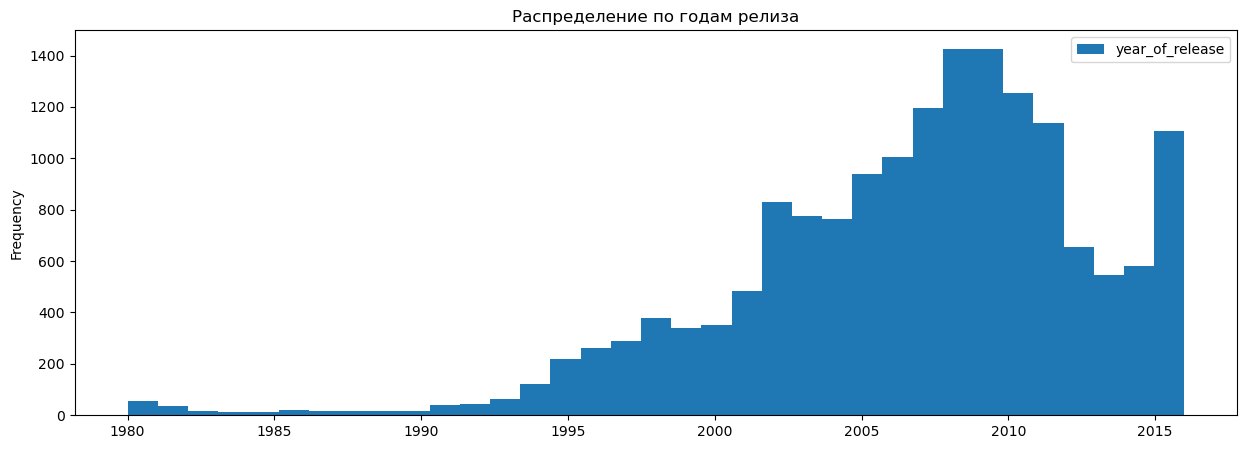

In [19]:
data['year_of_release'].plot(kind='hist', bins=35, figsize=(15,5)).legend()
plt.title('Распределение по годам релиза')
plt.show()

Игры появились в 1980-х годах. С 1995-года наблюдается рост числа выпущенных игр. С 2010 года спад.

2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
data_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
data_platform.sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
ps2,"1,255.77"
x360,971.42
ps3,939.65
wii,907.51
ds,806.12
ps,730.86
gba,317.85
ps4,314.14
psp,294.05


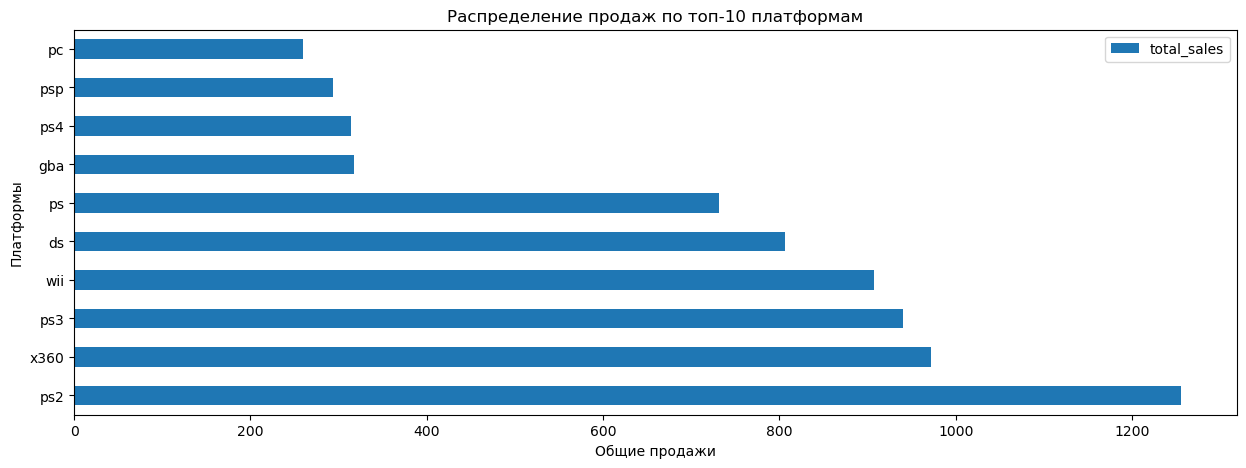

In [21]:
data_platform.sort_values(by='total_sales', ascending=False).head(10).plot(kind='barh', figsize=(15,5))
plt.xlabel('Общие продажи')
plt.ylabel('Платформы')
plt.title('Распределение продаж по топ-10 платформам')
plt.show()

Возьмем первые 6 платформ для построения распределения, так как по таблице и графику далее уже идет резкий спад количества продаж.

In [22]:
best_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

In [23]:
def sales_best_platforms(name, data):
    return (
        data
            .query('platform == @name')
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    )

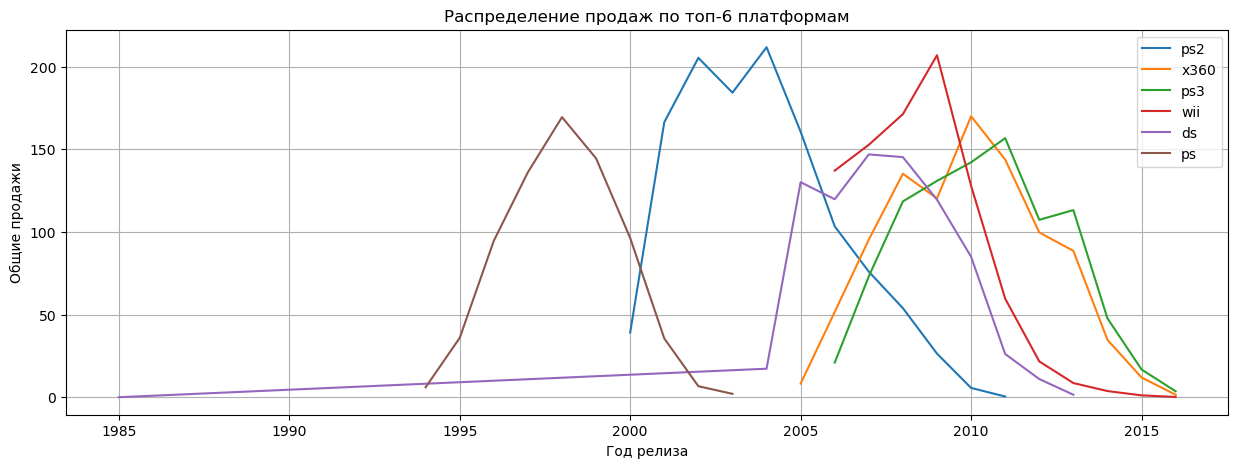

In [24]:
for platform in best_platforms:
    sales_best_platforms(platform, data)['total_sales'].plot(grid=True, figsize=(15, 5), label=platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Общие продажи')
    plt.legend()
plt.title('Распределение продаж по топ-6 платформам')
plt.show()

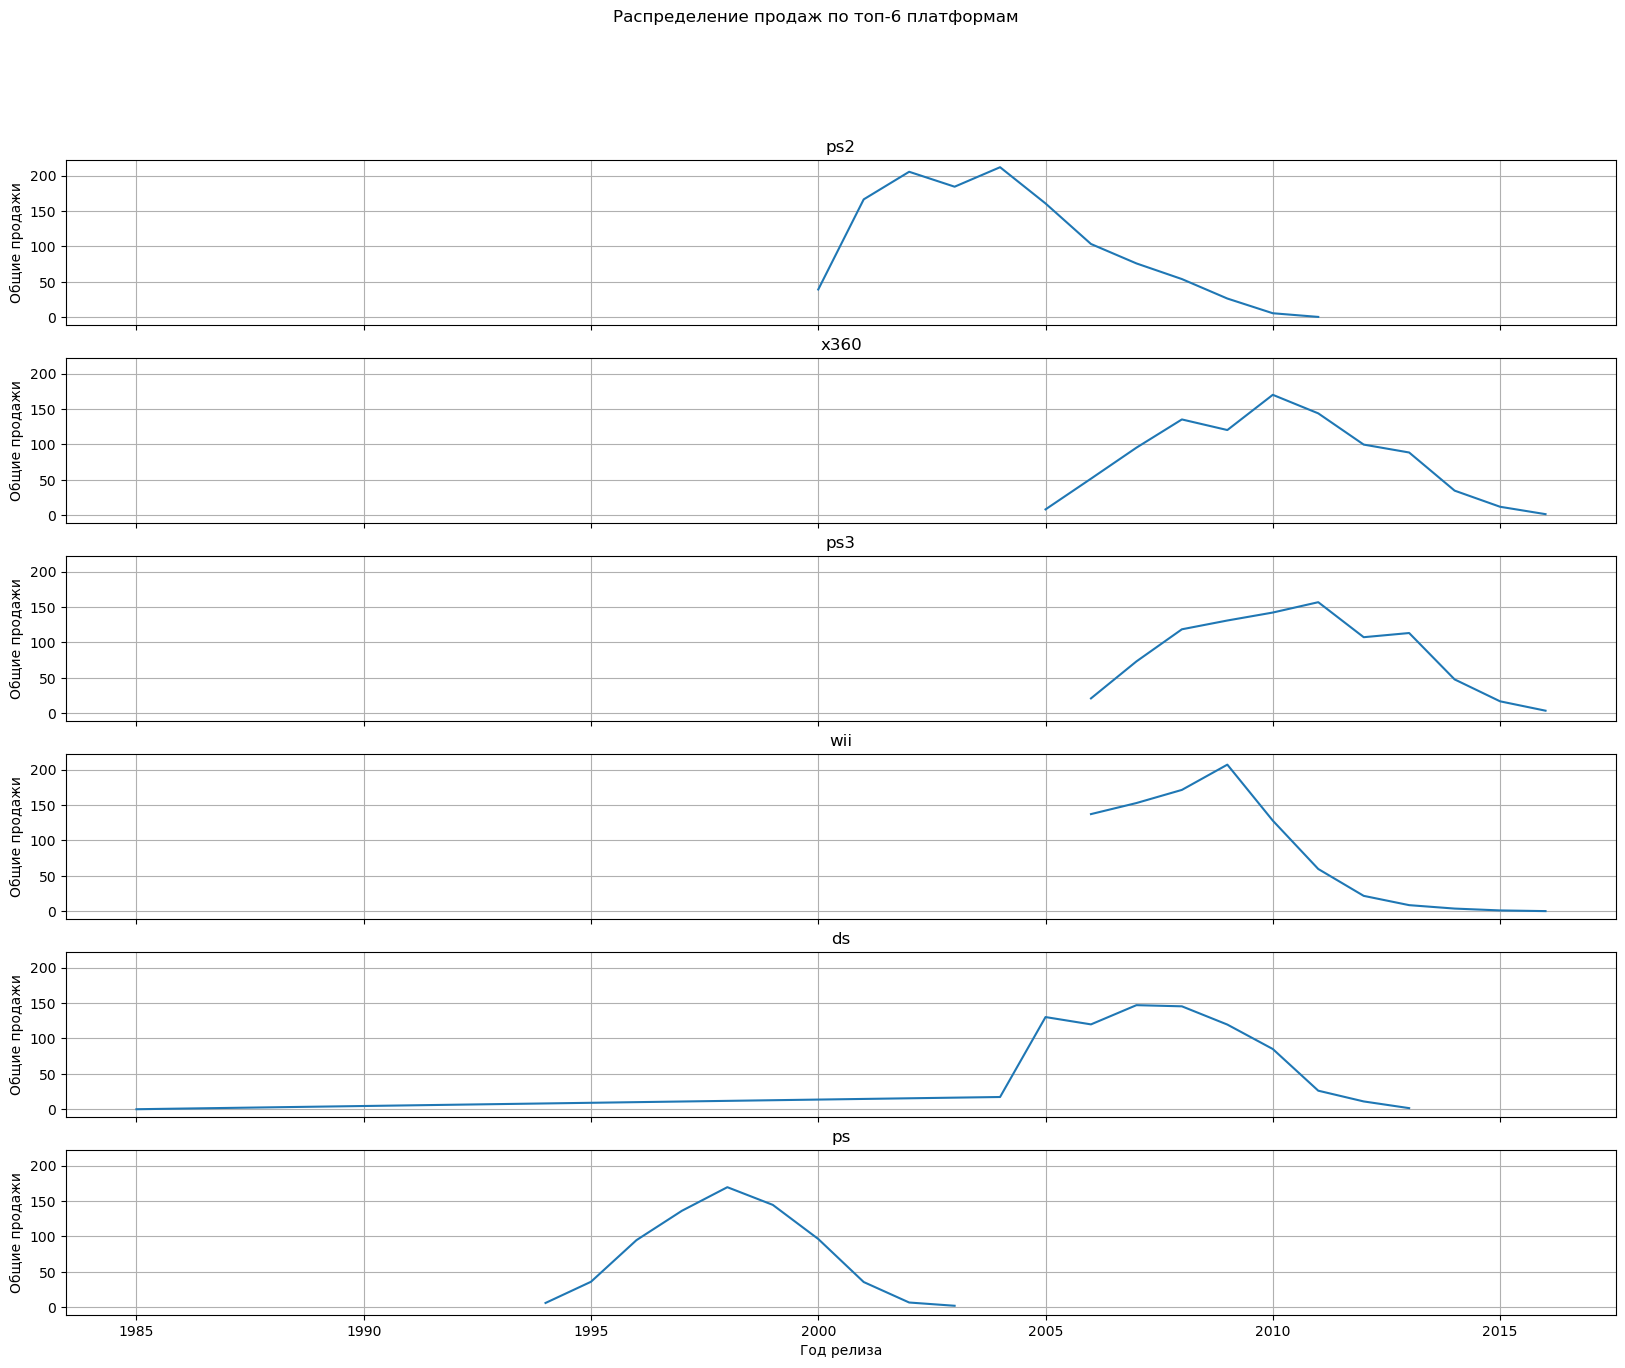

In [25]:
fig, ax = plt.subplots(len(best_platforms), sharex=True, sharey=True)
fig.suptitle('Распределение продаж по топ-6 платформам')
for i, platform in enumerate(best_platforms):
    (
        sales_best_platforms(platform, data)['total_sales']
        .plot(ax = ax[i], figsize=(20, 15), grid=True, label=platform)
    )
    ax[i].set_title(platform)
for ax in ax.flat:
    ax.set(xlabel='Год релиза', ylabel='Общие продажи')
plt.show()

array([<AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>,
       <AxesSubplot:xlabel='year_of_release'>], dtype=object)

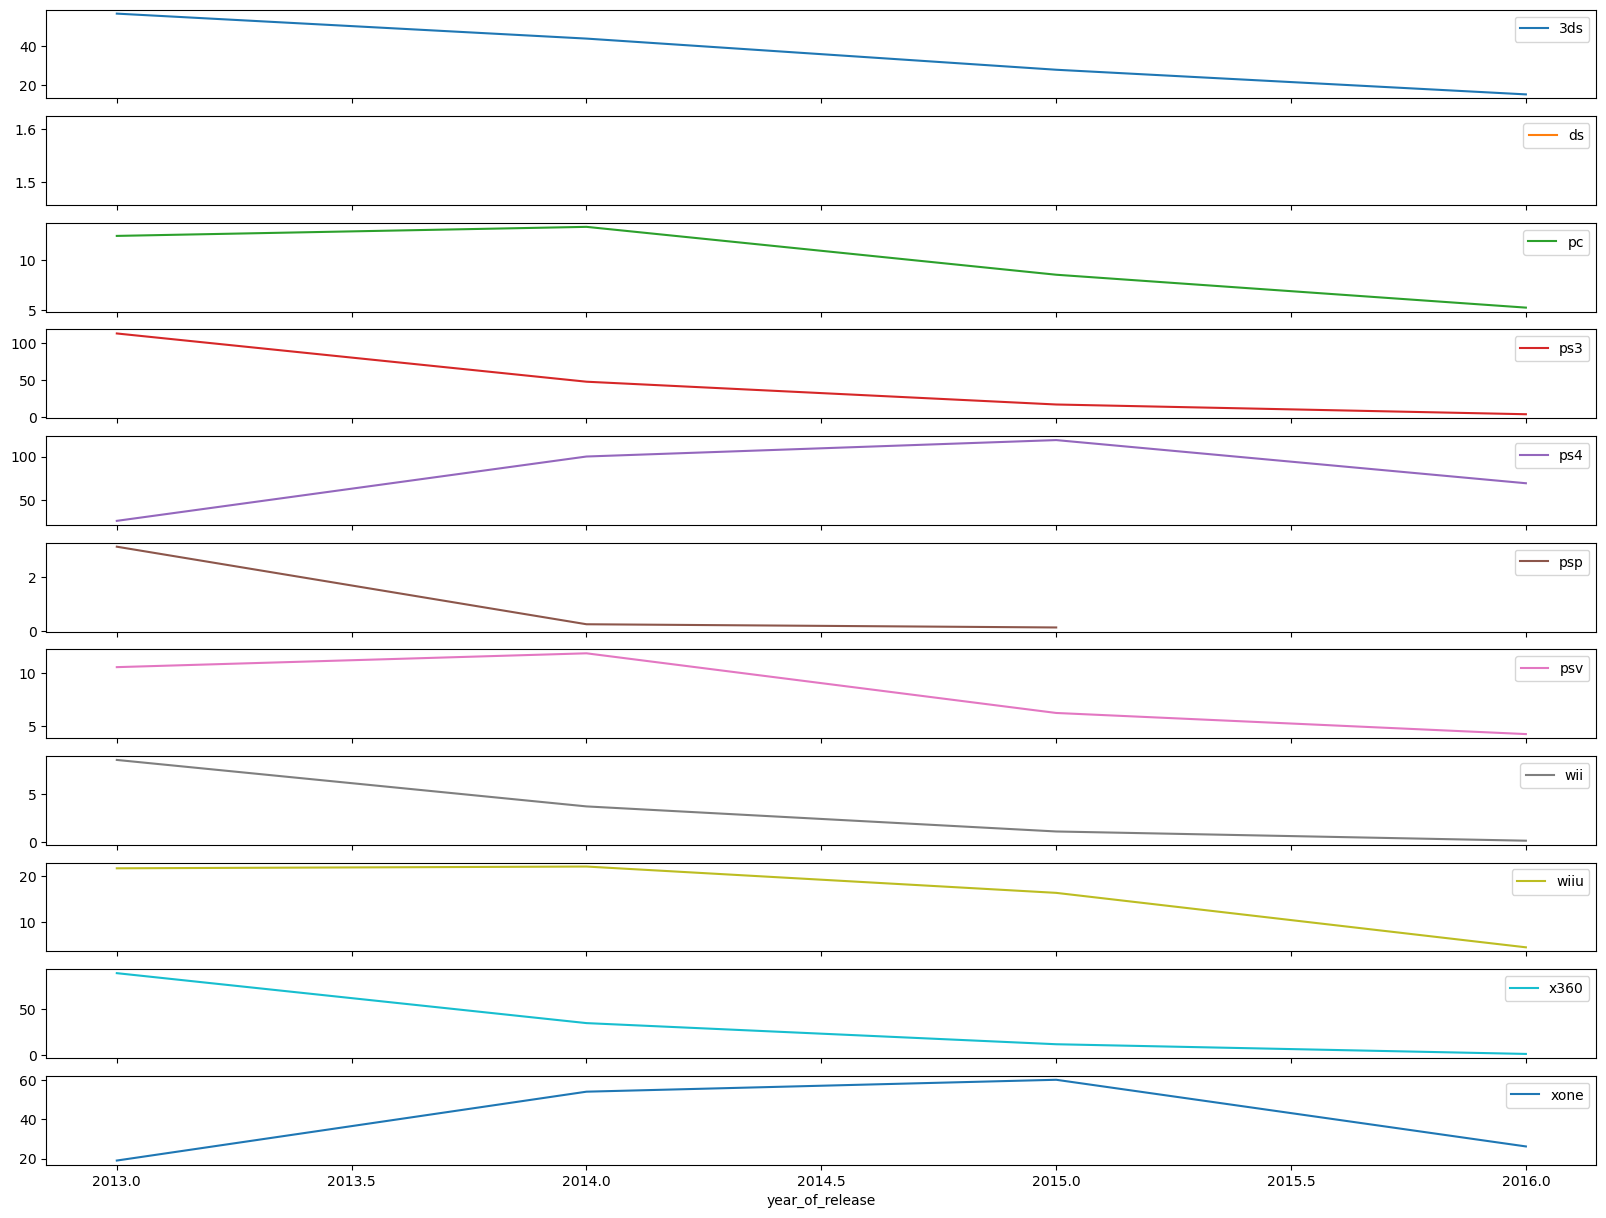

In [26]:
data.loc[
  data['year_of_release'] > 2012  
].pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
).plot(subplots=True, figsize=(20, 15))

**Вывод:** Из графика видно, что в среднем каждая платформа актуальна примерно в течение 10 лет: первые 5 лет наблюдается рост продаж, вторые 5 лет спад. Поэтому актуальным периодом будем считать данные за последние 5 лет, с 2012 года по 2016. Таким образом в выборку попадут актуальные платформы на настоящее время.

3. Возьмём данные за соответствующий актуальный период. Актуальный период определили выше в результате исследования предыдущих вопросов (с 2012 по 2016 годы). Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.

In [27]:
new_data = data.loc[(data['year_of_release'] >= 2012) & (data['year_of_release'] <= 2016)]
new_data.reset_index(drop= True, inplace= True)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   float64
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(8), object(4)
memory usage: 270.7+ KB


4. Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [28]:
new_data_pivot_table = (
    new_data
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
new_data_pivot_table

,total_sales
platform,
ps4,314.14
ps3,288.79
x360,236.54
3ds,194.61
xone,159.32
wiiu,82.19
pc,62.65
psv,49.18
wii,35.37


За последние 5 лет по продажам лидируют ps4, ps3, x360, 3ds, xone.

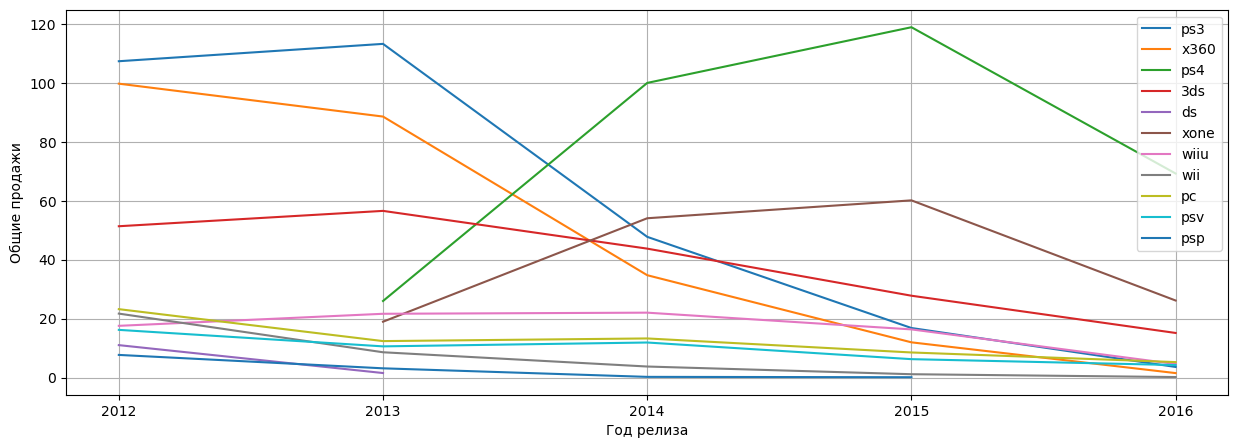

In [29]:
for platform in list(new_data['platform'].unique()):
    sales_best_platforms(platform, new_data)['total_sales'].plot(grid=True, figsize=(15, 5), label=platform)
    plt.xlabel('Год релиза')
    plt.ylabel('Общие продажи')
    plt.legend()
    plt.xticks(np.arange(2012, 2017, 1))

**Вывод:** Видим по графику, что все платформы находятся на спаде, но можно выделить потенциально прибыльные платформы: `ps4` и `xone`.

5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

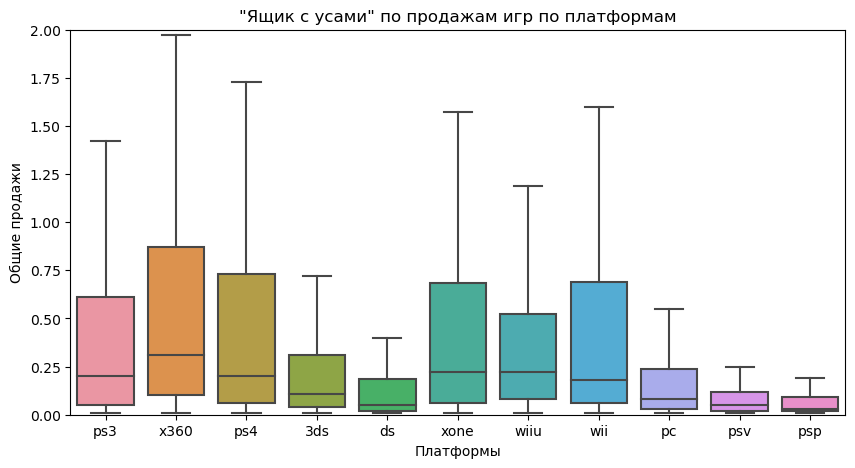

In [30]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=new_data, x='platform', y='total_sales', showfliers=False)
plt.ylabel('Общие продажи')
plt.xlabel('Платформы')
plt.ylim(0, 2)
plt.title('"Ящик с усами" по продажам игр по платформам')
plt.show()

Как и выше, выделим потенциально прибыльные `ps4` и `xone`. По данному графику еще так же можно добавить в этот список `x360` и `wii`.

6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

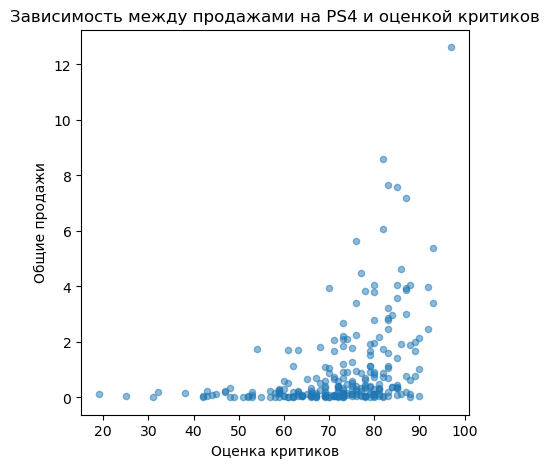

In [31]:
ps4 = new_data[(new_data['platform'] == 'ps4')]
ps4.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), alpha=0.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.title('Зависимость между продажами на PS4 и оценкой критиков')
plt.show()

In [32]:
ps4['critic_score'].corr(ps4['total_sales'])

0.40656790206178095

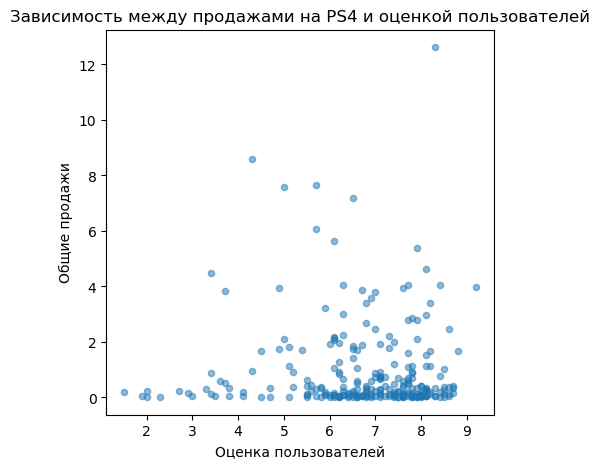

In [33]:
ps4.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), alpha=0.5)
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.title('Зависимость между продажами на PS4 и оценкой пользователей')
plt.show()

In [34]:
ps4['user_score'].corr(ps4['total_sales'])

-0.031957110204556376

**Вывод:** 
- Видим, что зависимость между продажами и оценками критиков есть, но слабая, коэффициент корреляции Пирсона 0.4. То есть чем выше оценка критиков, тем немного больше продажи. 
- Зависимость между оценкой пользователей и продажами практически полностью отсутствует.

7. Соотнесём выводы с продажами игр на других платформах.

Дополнительно рассмотрим зависимость между оценками и продажами двух платформах из топ-5: `x360` и `xone`.

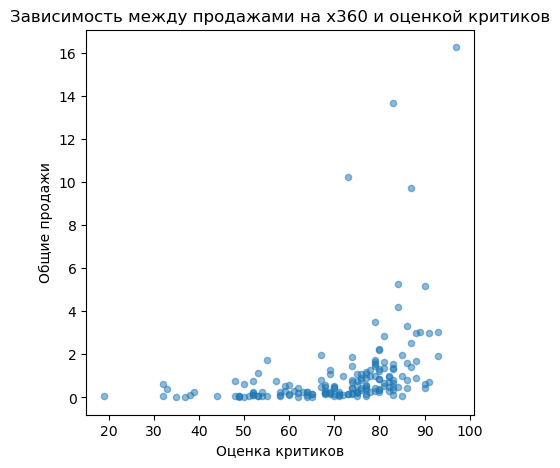

0.3605734888507336

In [35]:
x360 = new_data[(new_data['platform'] == 'x360')]
x360.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), alpha=0.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.title('Зависимость между продажами на x360 и оценкой критиков')
plt.show()
x360['critic_score'].corr(x360['total_sales'])

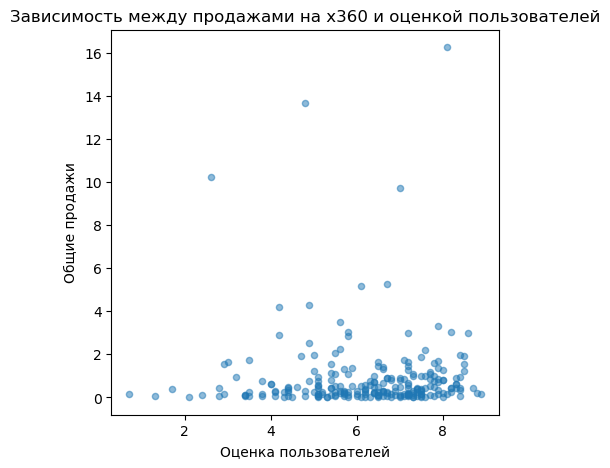

0.006163978646213326

In [36]:
x360.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), alpha=0.5)
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.title('Зависимость между продажами на x360 и оценкой пользователей')
plt.show()
x360['user_score'].corr(x360['total_sales'])

Наблюдаем аналогичную ситуацию, как с платформой `ps4`.

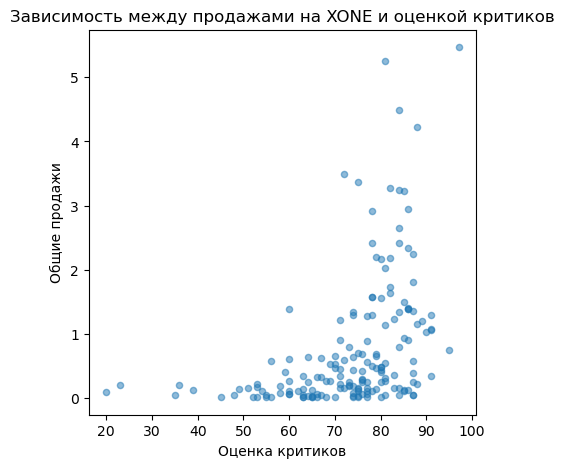

0.4169983280084017

In [37]:
xone = new_data[(new_data['platform'] == 'xone')]
xone.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(5,5), alpha=0.5)
plt.xlabel('Оценка критиков')
plt.ylabel('Общие продажи')
plt.title('Зависимость между продажами на XONE и оценкой критиков')
plt.show()
xone['critic_score'].corr(xone['total_sales'])

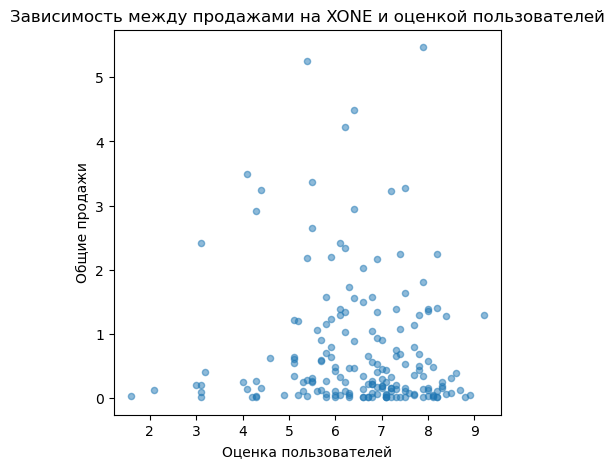

-0.06892505328279414

In [38]:
xone.plot(kind='scatter', x='user_score', y='total_sales', figsize=(5,5), alpha=0.5)
plt.xlabel('Оценка пользователей')
plt.ylabel('Общие продажи')
plt.title('Зависимость между продажами на XONE и оценкой пользователей')
plt.show()
xone['user_score'].corr(xone['total_sales'])

**Вывод:** При проверке зависимости на еще двух платформах ситуация не изменилась. Зависимость между отзывами критиков и продажами есть, но очень слабая, а между отзывами пользователей и продажами зависимости практически нет.

8. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

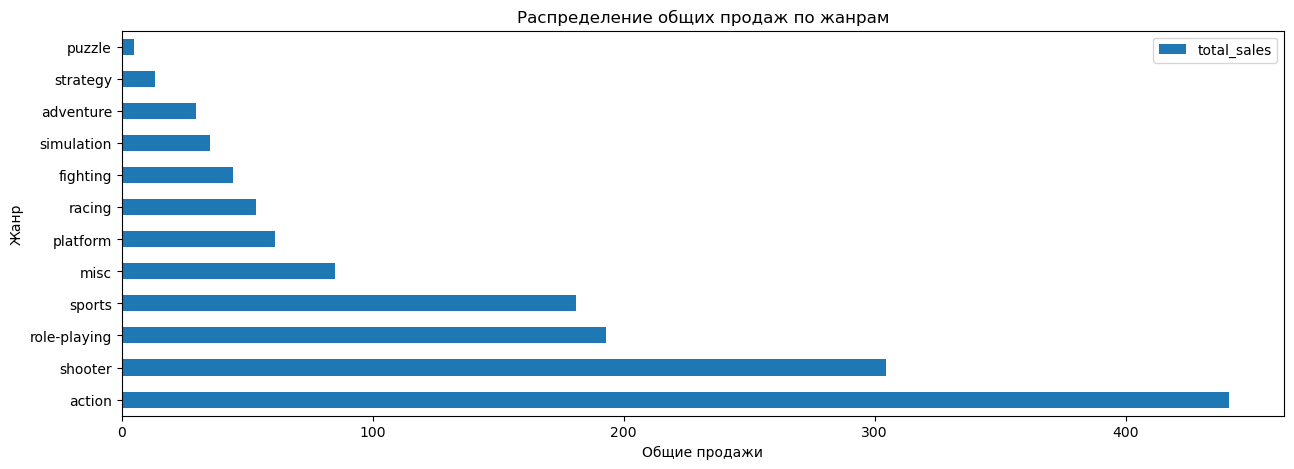

In [39]:
(
    new_data
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
    .plot(kind='barh', figsize=(15,5))
)
plt.title('Распределение общих продаж по жанрам')
plt.xlabel('Общие продажи')
plt.ylabel('Жанр')
plt.show()

**Вывод:** По продажам лидируют жанры `action` и `shooter` с приличным отрывом. С низкими продажами выделяются жанры `puzzle` и `strategy`. Но так же стоит отметить предположение о том, что разработка игр в лидирующих жанрах обходится гораздо дороже, нежели в жанрах с наименьшими продажами, соответственно стоимость игр выше. 

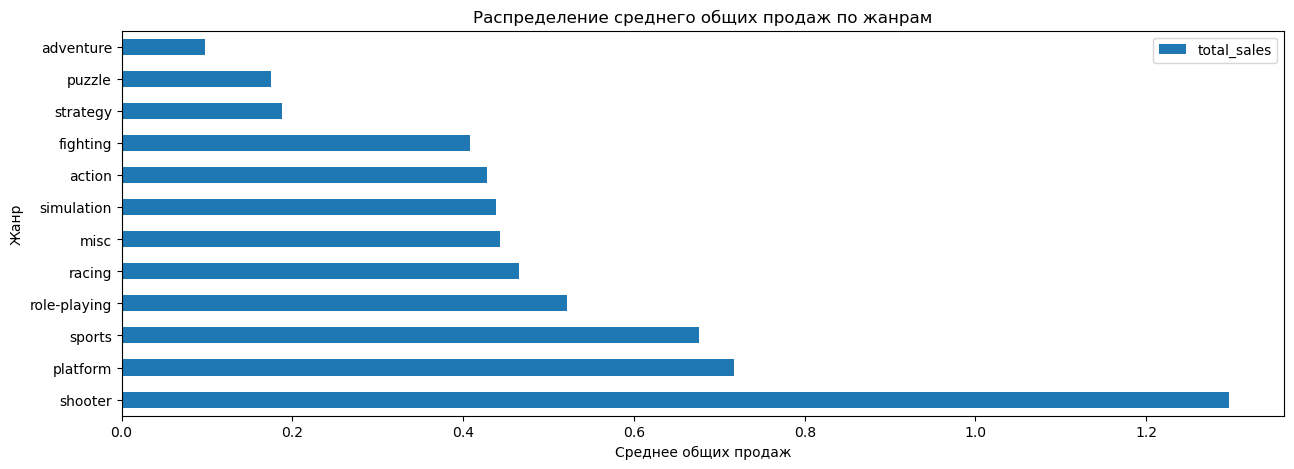

In [40]:
(
    new_data
    .pivot_table(index='genre', values='total_sales', aggfunc='mean')
    .sort_values('total_sales', ascending=False)
    .plot(kind='barh', figsize=(15,5))
)
plt.title('Распределение среднего общих продаж по жанрам')
plt.xlabel('Среднее общих продаж')
plt.ylabel('Жанр')
plt.show()

На данном графике сильно выделяется жанр `shooter` с высокими средними продажами, то есть упор предполагается делать больше на этот жанр. В топ-3 с низкими продажами так и остались жанры `puzzle`, `strategy` и `adventure`.

**Шаг 4. Составление портрета пользователя каждого региона**

Определим портрет для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). 

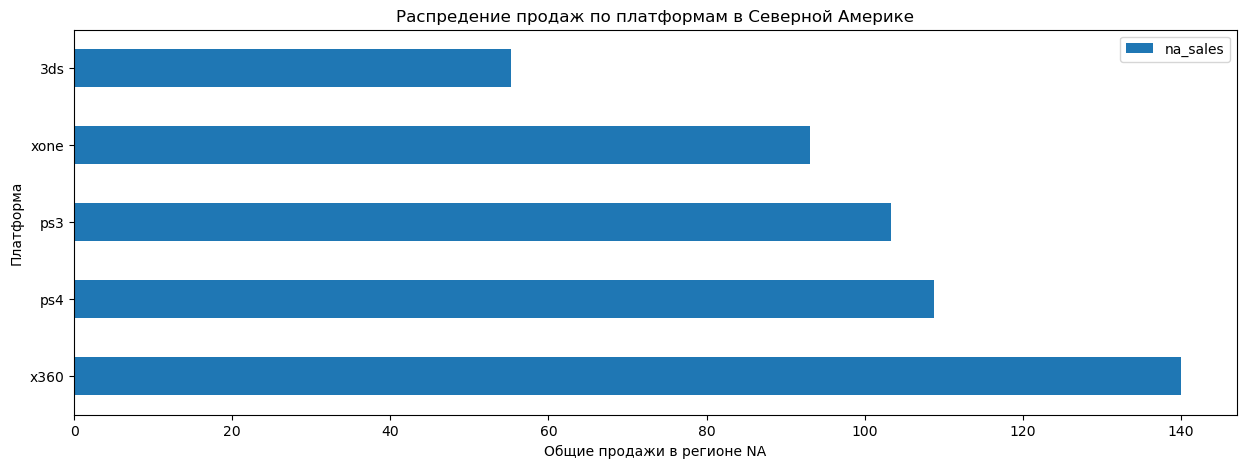

In [41]:
(
    new_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head(5)
    .plot(kind='barh', figsize=(15,5))
)
plt.ylabel('Платформа')
plt.xlabel('Общие продажи в регионе NA')
plt.title('Распредение продаж по платформам в Северной Америке')
plt.show()

Топ-3 платформы для пользователей Северной Америки: x360, ps4 и ps3. Лидирует x360.

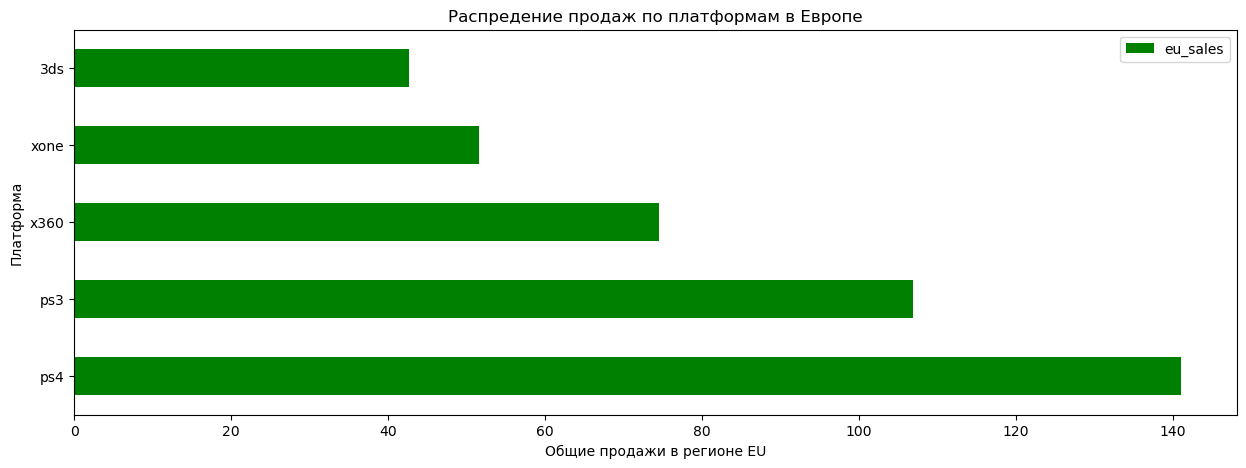

In [42]:
(
    new_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head(5)
    .plot(kind='barh', color='green', figsize=(15,5))
)
plt.ylabel('Платформа')
plt.xlabel('Общие продажи в регионе EU')
plt.title('Распредение продаж по платформам в Европе')
plt.show()

Аналогично топ 3 платформы для пользователей Европы: x360, ps4 и ps3. Лидирует ps4.

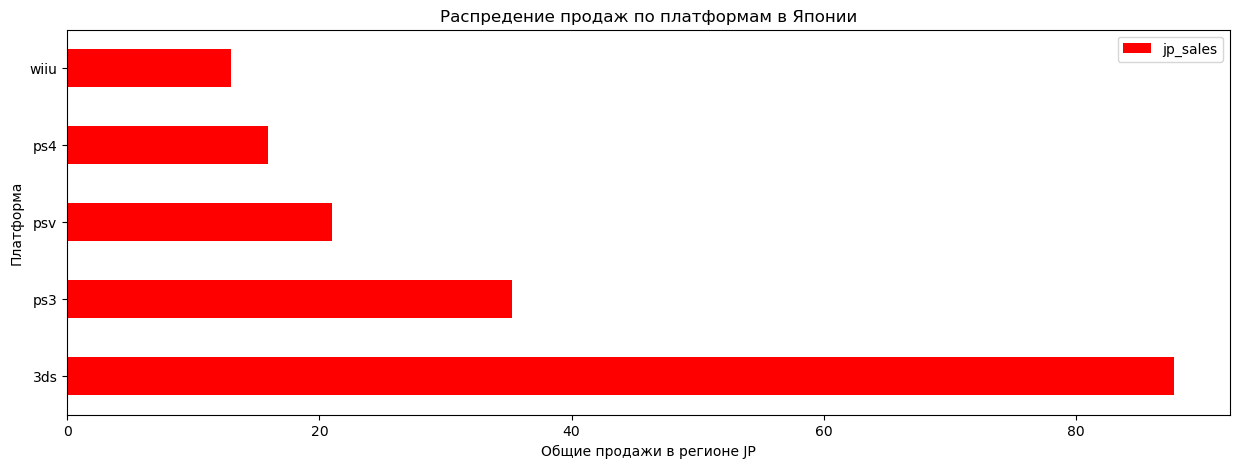

In [43]:
(
    new_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head(5)
    .plot(kind='barh', color='red', figsize=(15,5))
)
plt.ylabel('Платформа')
plt.xlabel('Общие продажи в регионе JP')
plt.title('Распредение продаж по платформам в Японии')
plt.show()

В Японии самая популярная платформа 3ds с большим отрывом. Посмотрим распределение по жанрам и рейтингам и после этого выдвинем предположение, почему лидирующая платформа в Японии так отличается от платформ в Европе и Америке.

- Самые популярные жанры (топ-5).

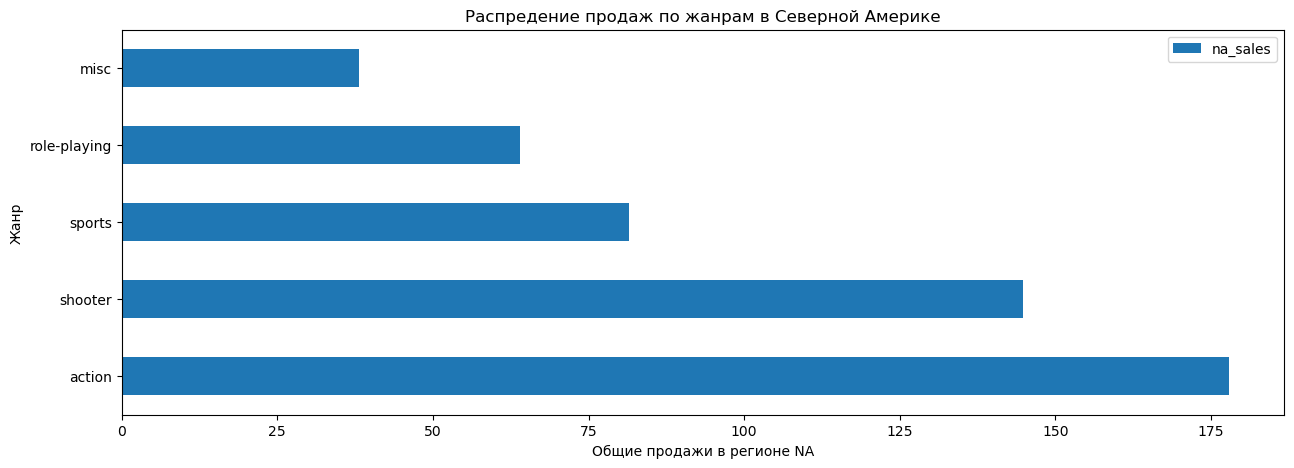

In [44]:
(
    new_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head(5)
    .plot(kind='barh', figsize=(15,5))
)
plt.ylabel('Жанр')
plt.xlabel('Общие продажи в регионе NA')
plt.title('Распредение продаж по жанрам в Северной Америке')
plt.show()

Наиболее популярные жанры в Северной Америке: action и shooter. Они же являются в целом самыми популярными в рассматриваемом периоде.

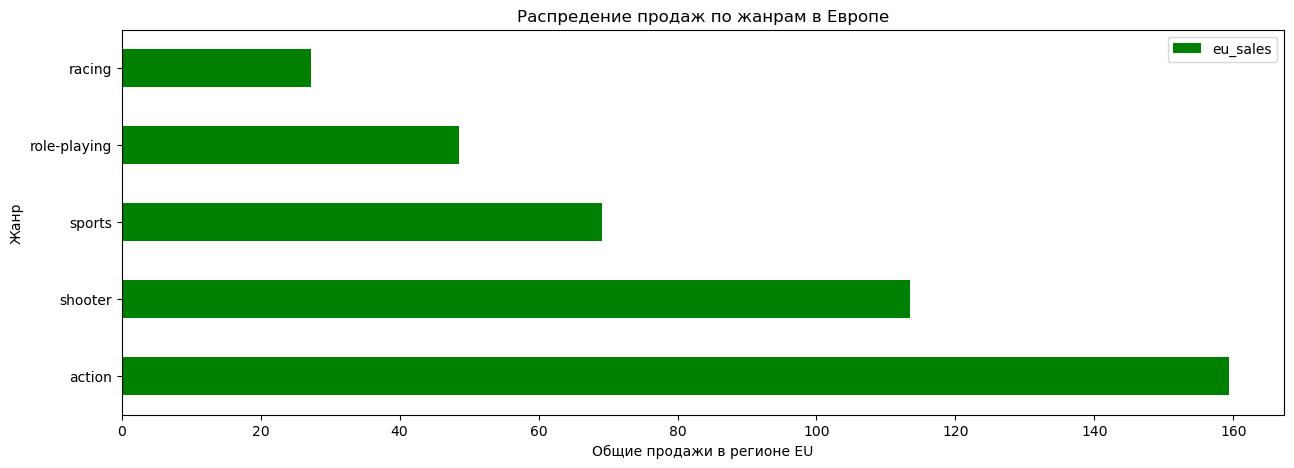

In [45]:
(
    new_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head(5)
    .plot(kind='barh', color='green', figsize=(15,5))
)
plt.ylabel('Жанр')
plt.xlabel('Общие продажи в регионе EU')
plt.title('Распредение продаж по жанрам в Европе')
plt.show()

Аналогично, популярные жанры в Европе: action и shooter.

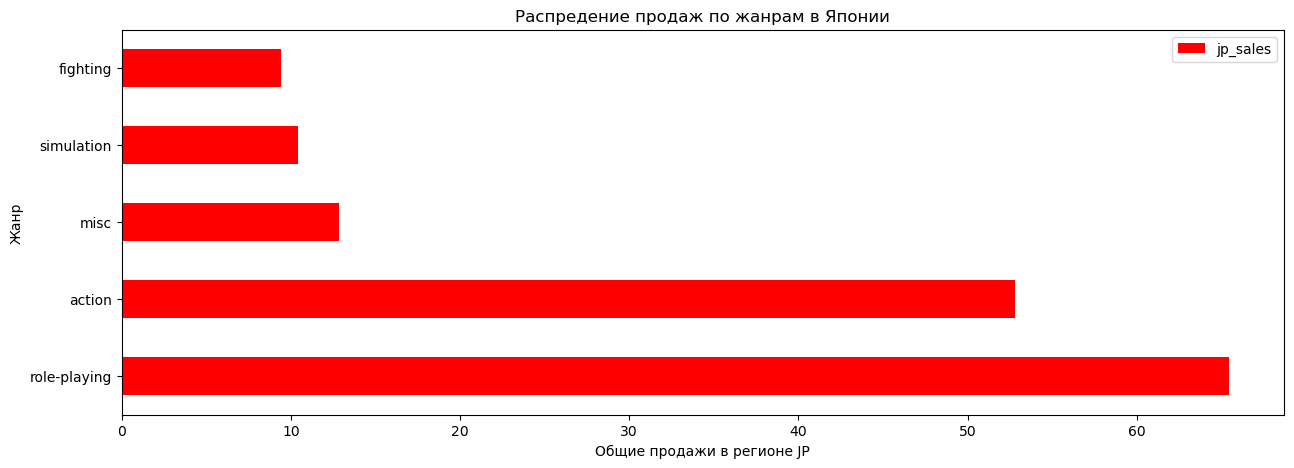

In [46]:
(
    new_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head(5)
    .plot(kind='barh', color='red', figsize=(15,5))
)
plt.ylabel('Жанр')
plt.xlabel('Общие продажи в регионе JP')
plt.title('Распредение продаж по жанрам в Японии')
plt.show()

В Японии ситуация поменялась, наиболее популярный жанр - role playing. Предполагаю, что отличие Японии от Европы и Америки в том, что в Японии подавляющее большинство людей любят аниме, комиксы, манги, поэтому данный жар игр у них наиболее популярен.

- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

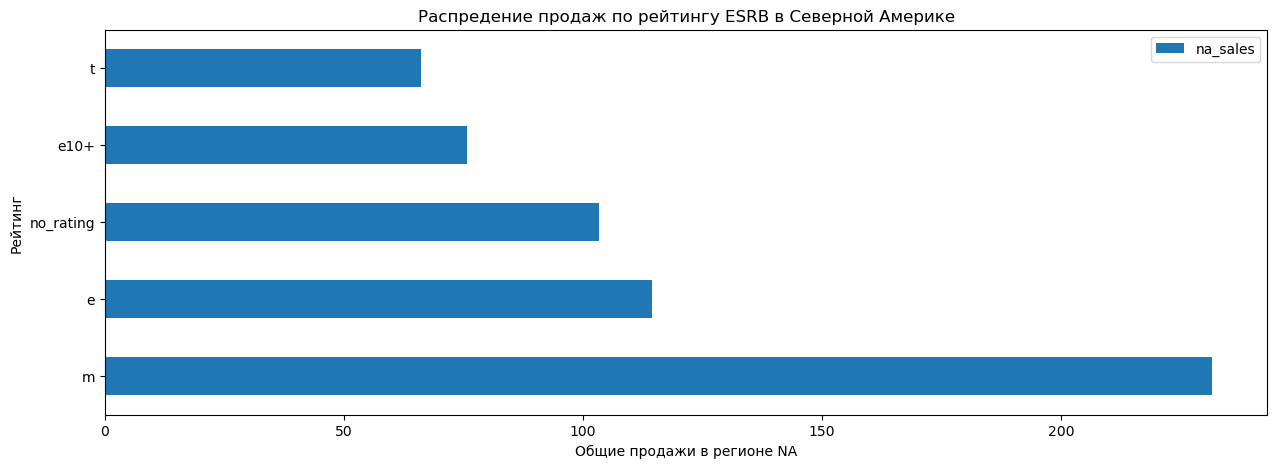

In [47]:
(
    new_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).head(5)
    .plot(kind='barh', figsize=(15,5))
)
plt.ylabel('Рейтинг')
plt.xlabel('Общие продажи в регионе NA')
plt.title('Распредение продаж по рейтингу ESRB в Северной Америке')
plt.show()

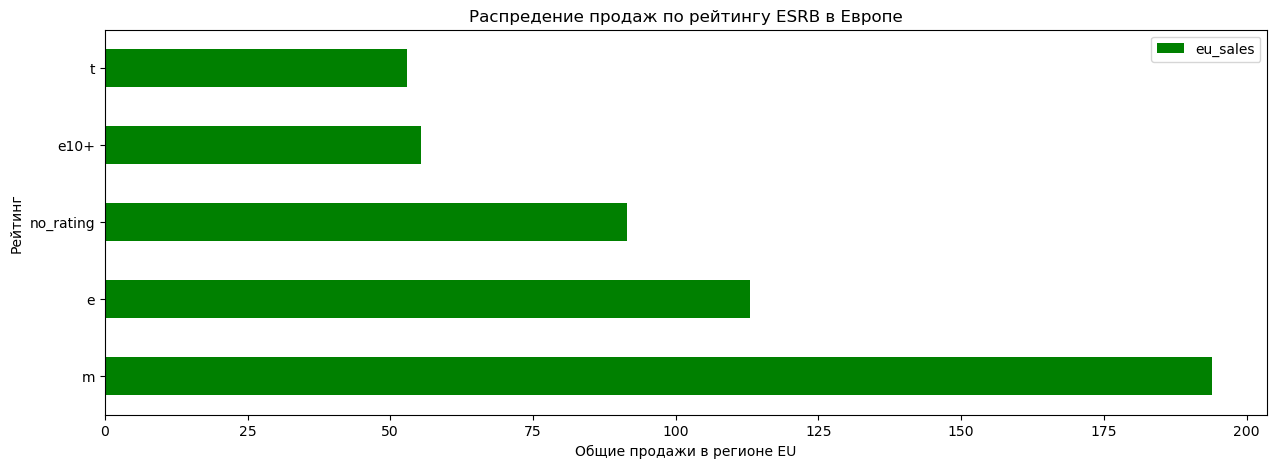

In [48]:
(
    new_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).head(5)
    .plot(kind='barh', color='green', figsize=(15,5))
)
plt.ylabel('Рейтинг')
plt.xlabel('Общие продажи в регионе EU')
plt.title('Распредение продаж по рейтингу ESRB в Европе')
plt.show()

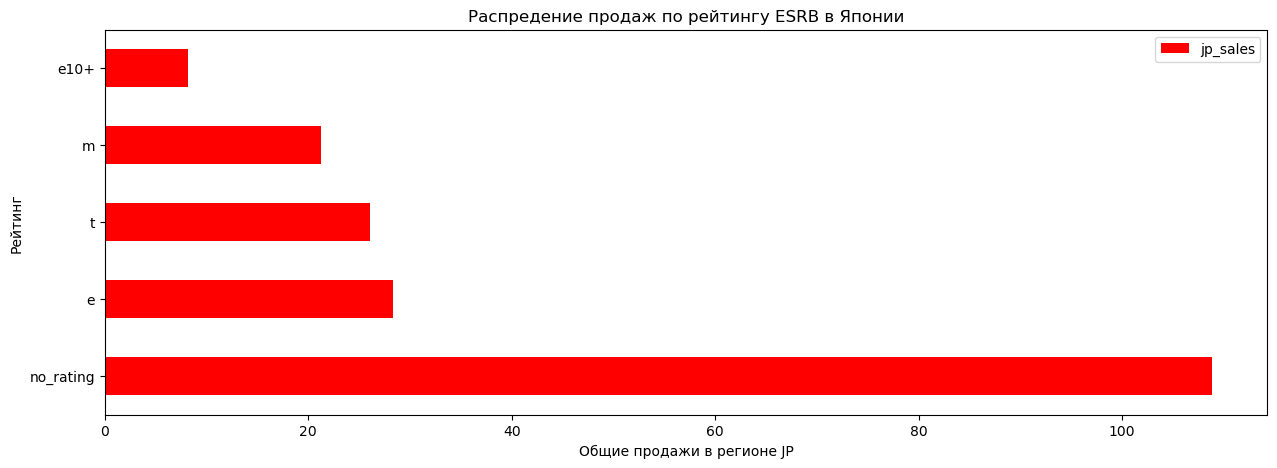

In [49]:
(
    new_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).head(5)
    .plot(kind='barh', color='red', figsize=(15,5))
)
plt.ylabel('Рейтинг')
plt.xlabel('Общие продажи в регионе JP')
plt.title('Распредение продаж по рейтингу ESRB в Японии')
plt.show()

**Вывод:**
1. Портрет пользователя Северной Америки:
- Топ-3 платформы: x360, ps4 и ps3. Лидирует x360.
- Наиболее популярные жанры: action и shooter.
- Игры с рейтингом M и Е имеют сильно большую популярность.

Рейтинг M: «Mature» — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови, непристойные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

Рейтинг Е: «Everyone» — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

2. Портрет пользователя Европы:
- Топ 3 платформы: x360, ps4 и ps3. Лидирует ps4.
- Наиболее популярные жанры: action и shooter.
- Игры с рейтингом M и Е имеют сильно большую популярность.

3. Портрет пользователя Японии:
- Cамая популярная платформа 3ds с большим отрывом.
- Наиболее популярный жанр - role playing.
- Игры без рейтинга имеют большую популярность.

Как и предположили выше, в Японии имеет сильную популярность аниме, манги и комиксы, поэтому role playing самый популярный жанр среди игр. Такие отличия по платформе и жанру вызваны различиями культур Японии и Европы/Северной Америки. Как мы знаем, 3ds - это портативная игровая система производства Nintendo, то есть можно брать ее с собой куда угодно и играть (например, в дороге). Так же, учитывая популярный жанр role playing, на данной платформе удобно играть в подобные игры. Рейтинг игр для Японии значения не имеет.

## Проверим гипотезы

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- `Н0 (нулевая гипотеза)` - средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- `H1 (альтернативная гипотеза)` - средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [50]:
xone_score = new_data[(new_data['platform'] == 'xone') & (new_data['user_score'] >= 0)]['user_score']
pc_score = new_data[(new_data['platform'] == 'pc') & (new_data['user_score'] >= 0)]['user_score']
alpha = 0.05
results = st.ttest_ind(xone_score, pc_score)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

- `Н0 (нулевая гипотеза)` - cредние пользовательские рейтинги жанров Action и Sports одинаковые.
- `H1 (альтернативная гипотеза)` - средние пользовательские рейтинги жанров Action и Sports различаются.

In [51]:
action_score = new_data[(new_data['genre'] == 'action') & (new_data['user_score'] >= 0)]['user_score']
sports_score = new_data[(new_data['genre'] == 'sports') & (new_data['user_score'] >= 0)]['user_score']
alpha = 0.05
results = st.ttest_ind(action_score, sports_score)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


**Вывод:** 
- Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" подтвердилась.
- Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" подвердилась. 

## Общий вывод

- В общем и целом рынок видеоигр находится на спаде. Предположительно потому, что появляется много мобильных приложений и игр, которые составляют конкуренцию. Возможно, стоит обратить внимание на данный рынок и рассмотреть эти платформы для сотрудничества.
-  В среднем платформа актуальна в течение 10 лет. Первые 5 лет растет, вторые 5 лет на спаде.
- Для анализа был выбран период последних 5 лет (с 2012 по 2016 годы).
- По общим продажам по платформам за выбранный период лидируют: ps4, ps3, x360, 3ds, xone.
- Потенциально прибыльные платформы: ps4, xone, x360 и wii.
- По общим продажам по жанрам лидеры Action и Shooter с рейтингом M и Е. Но если делать упор на японских пользователей, то стоит выделить жанр role playing.
- Есть небольшая зависимость между отзывами критиков и продажами. Отзывы пользователей не влияют на продажи.
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports различаются.